In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from multiprocessing import Pool

```
$ aws s3 sync s3://florencia-velez/working/20201103_Elinav_metagenomics_bt2/output_mag_mapping/stats/ 20201103_Elinav_metagenomics_bt2/output_mag_mapping/stats/ --exclude "*" --include "*_depth.txt"
$ aws s3 cp s3://florencia-velez/working/20201103_Elinav_metagenomics_bt2/output_mag_mapping/stats/ERR2749128_depth.txt 20201103_Elinav_metagenomics_bt2/output_mag_mapping/stats/ERR2749128_depth.txt
```

In [2]:
! aws s3 cp s3://florencia-velez/working/20201026_elinav_segal_2018_metagenomics/SraRunTable_PRJEB28097_filtered.txt /home/ec2-user/20201026_elinav_segal_2018_metagenomics/SraRunTable_PRJEB28097_filtered.txt

download: s3://florencia-velez/working/20201026_elinav_segal_2018_metagenomics/SraRunTable_PRJEB28097_filtered.txt to ../20201026_elinav_segal_2018_metagenomics/SraRunTable_PRJEB28097_filtered.txt


In [3]:
#Color by GI sublocalization
#Import metadata
meta = pd.read_csv('~/20201026_elinav_segal_2018_metagenomics/SraRunTable_PRJEB28097_filtered.txt', sep='\t')

```
#Download metadata for HGM genomes
$ cd
$ aws s3 cp s3://florencia-velez/working/20190504_HGM_prodigal/IGG_species_info_23790.tsv 20190504_HGM_prodigal/IGG_species_info_23790.tsv
$ aws s3 cp s3://florencia-velez/working/20190504_HGM_prodigal/IGG_genome_info_206581.tsv 20190504_HGM_prodigal/IGG_genome_info_206581.tsv
```

In [4]:
#Import metadata for HGM MAGs
HGM_species = pd.read_csv('/home/ec2-user/20190504_HGM_prodigal/IGG_species_info_23790.tsv', sep='\t')
HGM_genomes = pd.read_csv('/home/ec2-user/20190504_HGM_prodigal/IGG_genome_info_206581.tsv', sep='\t')

/home/ec2-user/bin/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Code to calculate coverage from depth files of each sample was run through script 20210102_elinav_metagenomic_bt2_depth.py but it failed due to low memory so only 74 files were analyzed of the 231 or so.

# Analyze depth of metagenomic reads from sample mapping to MAGs
#Perform depth calculation for each genome_id in HGM_genomes, for each sample

```
depth_header = ['refseqname','pos','depth']
os.mkdir('ipynb_out/covbysample')

def extract_sample_covs(sample_depth_path):
    sample_depth_path = '/home/ec2-user/20201103_Elinav_metagenomics_bt2/output_mag_mapping/stats/' + depthfile_list[0]
    sample = sample_depth_path.replace('/home/ec2-user/20201103_Elinav_metagenomics_bt2/output_mag_mapping/stats/','').replace('_depth.txt','')
    perc_cov_dict = dict()
    depth = pd.read_csv(sample_depth_path, sep='\t', header=None, names=depth_header)
    depth['genome_id'] = ['_'.join(name.split('_')[:-2]) for name in depth['refseqname']]
    depth_grouped = depth.groupby('genome_id')
    for name, group in depth_grouped:
        if name in HGM_genomes['genome_id'].tolist():
            len_genome = int(HGM_genomes[HGM_genomes['genome_id'] == name]['genome_length'])
            bases_cov_by_1read = len(depth[depth['genome_id'] == name]['pos'].unique())
            perc_cov = bases_cov_by_1read/len_genome*100
            perc_cov_dict[name] = perc_cov
    #(and then subselect those that are in HGM_genomes that we have analyzed metasescretomes)
    perc_cov_sample_series = pd.Series(perc_cov_dict, name=sample)
    perc_cov_sample_series.to_csv('ipynb_out/covbysample/cov_'+ sample + '.csv')
    return('Done with ' + sample)

statfile_list = os.listdir('/home/ec2-user/20201103_Elinav_metagenomics_bt2/output_mag_mapping/stats/')
depthfile_list = []
for statfile in statfile_list:
    if statfile.split('_')[-1] == 'depth.txt':
        depthfile_list.append(statfile)
        
with Pool(2) as p:
    list_of_cov_series = p.map(extract_sample_covs, depthfile_list[:2])
```

In [6]:
! aws s3 sync s3://florencia-velez/working/20201103_Elinav_metagenomics_bt2/ipynb_out/covbysample/ /home/ec2-user/20201103_Elinav_metagenomics_bt2/ipynb_out/covbysample/

download: s3://florencia-velez/working/20201103_Elinav_metagenomics_bt2/ipynb_out/covbysample/cov_ERR2749119.csv to ../20201103_Elinav_metagenomics_bt2/ipynb_out/covbysample/cov_ERR2749119.csv
download: s3://florencia-velez/working/20201103_Elinav_metagenomics_bt2/ipynb_out/covbysample/cov_ERR2749122.csv to ../20201103_Elinav_metagenomics_bt2/ipynb_out/covbysample/cov_ERR2749122.csv
download: s3://florencia-velez/working/20201103_Elinav_metagenomics_bt2/ipynb_out/covbysample/cov_ERR2749120.csv to ../20201103_Elinav_metagenomics_bt2/ipynb_out/covbysample/cov_ERR2749120.csv
download: s3://florencia-velez/working/20201103_Elinav_metagenomics_bt2/ipynb_out/covbysample/cov_ERR2749117.csv to ../20201103_Elinav_metagenomics_bt2/ipynb_out/covbysample/cov_ERR2749117.csv
download: s3://florencia-velez/working/20201103_Elinav_metagenomics_bt2/ipynb_out/covbysample/cov_ERR2749124.csv to ../20201103_Elinav_metagenomics_bt2/ipynb_out/covbysample/cov_ERR2749124.csv
download: s3://florencia-velez/work

download: s3://florencia-velez/working/20201103_Elinav_metagenomics_bt2/ipynb_out/covbysample/cov_ERR2750682.csv to ../20201103_Elinav_metagenomics_bt2/ipynb_out/covbysample/cov_ERR2750682.csv
download: s3://florencia-velez/working/20201103_Elinav_metagenomics_bt2/ipynb_out/covbysample/cov_ERR2750690.csv to ../20201103_Elinav_metagenomics_bt2/ipynb_out/covbysample/cov_ERR2750690.csv
download: s3://florencia-velez/working/20201103_Elinav_metagenomics_bt2/ipynb_out/covbysample/cov_ERR2750688.csv to ../20201103_Elinav_metagenomics_bt2/ipynb_out/covbysample/cov_ERR2750688.csv
download: s3://florencia-velez/working/20201103_Elinav_metagenomics_bt2/ipynb_out/covbysample/cov_ERR2750689.csv to ../20201103_Elinav_metagenomics_bt2/ipynb_out/covbysample/cov_ERR2750689.csv
download: s3://florencia-velez/working/20201103_Elinav_metagenomics_bt2/ipynb_out/covbysample/cov_ERR2750693.csv to ../20201103_Elinav_metagenomics_bt2/ipynb_out/covbysample/cov_ERR2750693.csv
download: s3://florencia-velez/work

In [9]:
covmag_by_sample = pd.DataFrame()
for covcsv in os.listdir('/home/ec2-user/20201103_Elinav_metagenomics_bt2/ipynb_out/covbysample/'):
    covmag_one_sample = pd.read_csv('/home/ec2-user/20201103_Elinav_metagenomics_bt2/ipynb_out/covbysample/' + covcsv, 
                                header=None, names=['genome_id',covcsv.replace('cov_','').replace('.csv','')], 
                                index_col='genome_id',squeeze=True)
    covmag_by_sample = covmag_by_sample.append(covmag_one_sample)

In [11]:
stomach_prox2dist = ['Gastric fundus mucosa',
                     'Stomach lumen',
                     'Gastric antrum mucosa']
small_int_prox2dist = ['Duodenal bulb mucosa',
                       'Duodenum lumen',
                       'Jejunum mucosa',
                       'Jejunum lumen',
                       'Terminal ileum mucosa',
                      'Terminal ileum lumen']
large_int_prox2dist = ['Cecum mucosa',
                       'Cecum lumen',
                       'Ascending colon mucosa',
                       'Transverse colon mucosa',
                       'Descending colon lumen',
                       'Descending colon mucosa',
                       'Sigmoid colon mucosa',
                       'Rectum mucosa']

gi_prox2dist = ['Gastric fundus mucosa',
                     'Stomach lumen',
                     'Gastric antrum mucosa',
                     'Duodenal bulb mucosa',
                       'Duodenum lumen',
                       'Jejunum mucosa',
                       'Jejunum lumen',
                       'Terminal ileum mucosa',
                      'Terminal ileum lumen',
                     'Cecum mucosa',
                       'Cecum lumen',
                       'Ascending colon mucosa',
                       'Transverse colon mucosa',
                       'Descending colon lumen',
                       'Descending colon mucosa',
                       'Sigmoid colon mucosa',
                       'Rectum mucosa']

col_dict = {'Ascending colon mucosa':'orange', 
 'Cecum lumen': 'cornflowerblue',
'Cecum mucosa': 'blue',
 'Descending colon lumen':'tomato',
'Descending colon mucosa':'red',
'Duodenal bulb mucosa':'teal',
'Duodenum lumen':'turquoise',
'Gastric antrum mucosa':'gray',
'Gastric fundus mucosa':'silver',
'Jejunum lumen':'violet',
'Jejunum mucosa':'magenta',
'Rectum mucosa': 'peru',
'Sigmoid colon mucosa':'chocolate', 
'Stomach lumen': 'gold',
'Terminal ileum lumen': 'limegreen',
'Terminal ileum mucosa': 'forestgreen',
'Transverse colon mucosa': 'sienna'}

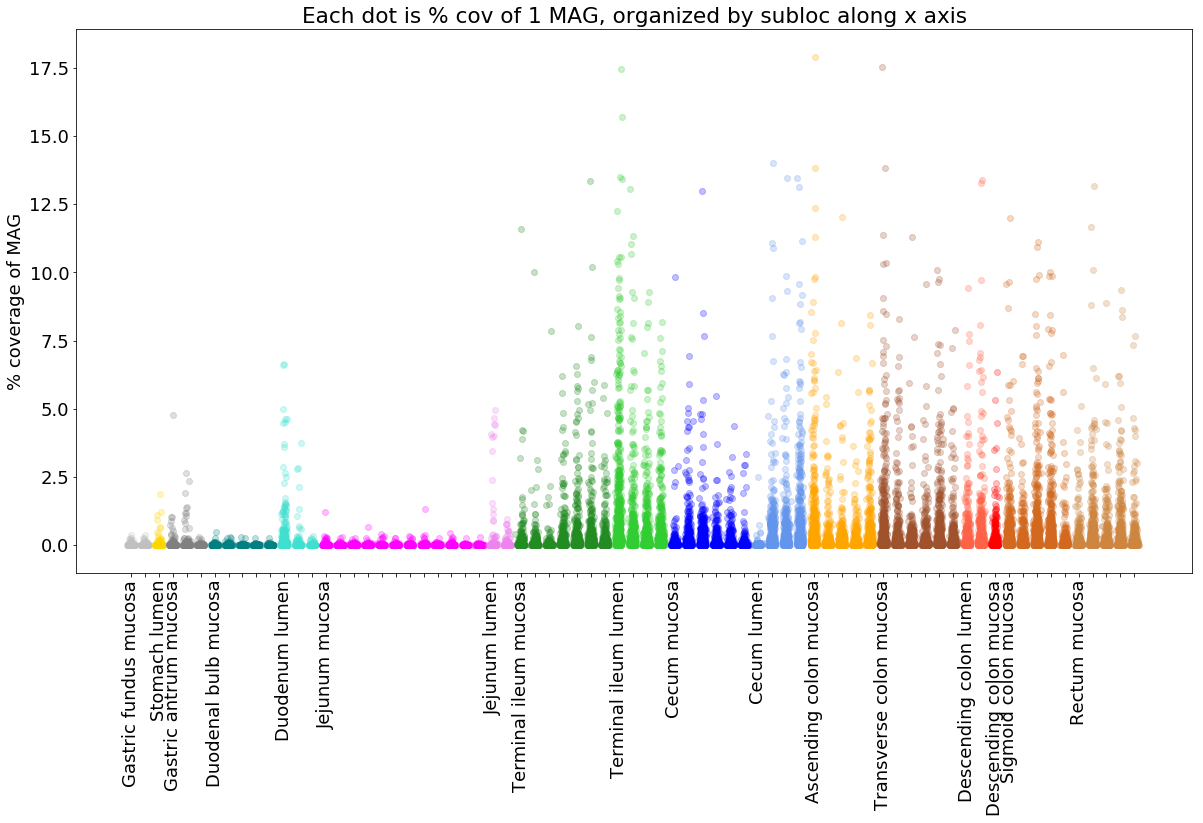

In [21]:
plt.rcParams.update({'font.size': 18})
xpos = 0
xtickspos = []
xtickslabels = []
plt.subplots(figsize=[20,10])
for subloc in gi_prox2dist:
    runs_in_subloc = meta[meta['tissue_type'] == subloc].Run.tolist()
    xticklabel_count = 0
    for sample in runs_in_subloc:
        if sample in covmag_by_sample.index.tolist():
            sel = covmag_by_sample.loc[sample].dropna()
            xpoints = xpos + np.random.randn(len(sel))*0.1
            ##plt.scatter(x=[xpos]*len(sel), y=sel, alpha=0.5, color=col_dict[subloc])
            plt.scatter(x=xpoints, y=sel, alpha=0.25, color=col_dict[subloc])
            ##plt.violinplot(dataset=list(sel))#, positions=[xpos]*len(sel))
            if xticklabel_count == 0:
                xtickspos.append(xpos)
                xtickslabels.append(subloc)
            else:
                xtickspos.append(xpos)
                xtickslabels.append('')
            xpos = xpos + 1
            xticklabel_count = xticklabel_count + 1
plt.ylabel('% coverage of MAG')
plt.xticks(ticks=xtickspos, labels=xtickslabels, rotation=90)
plt.title('Each dot is % cov of 1 MAG, organized by subloc along x axis')
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('ipynb_out/Figures/FigS6_v1_scatterplot_gi_subloc_mag_coverage.svg',format='svg')
plt.show()